In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_addons as tfa  # Import the tensorflow_addons module

# Set image size and number of classes
img_size = (244, 244)
num_classes = 12  # Replace with the actual number of classes in your dataset

# Load MobileNetV2 pre-trained on ImageNet data
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_size[0], img_size[1], 3), include_top=False, weights='imagenet')

# Freeze the convolutional base
base_model.trainable = False

# Create your own model on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model using Rectified Adam (RAdam) optimizer from tensorflow_addons
radam_optimizer = tfa.optimizers.RectifiedAdam(learning_rate=1e-4)
model.compile(optimizer=radam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/opt/homebrew/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 2423500 (9.24 MB)
Trainable params: 165516

In [2]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

# Assuming you have a directory structure with train and validation sets
train_generator = train_datagen.flow_from_directory(
    '/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/train',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/validation',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 15516 images belonging to 12 classes.
Found 4944 images belonging to 12 classes.


### Train the model in two steps as described
#### First step

In [3]:

hist1 = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
485/485 [==============================] - 208s 426ms/step - loss: 2.3063 - accuracy: 0.2365 - val_loss: 1.7992 - val_accuracy: 0.4597
Epoch 2/10
485/485 [==============================] - 212s 437ms/step - loss: 1.5613 - accuracy: 0.4476 - val_loss: 1.5195 - val_accuracy: 0.5188
Epoch 3/10
485/485 [==============================] - 213s 438ms/step - loss: 1.3279 - accuracy: 0.5150 - val_loss: 1.4210 - val_accuracy: 0.5583
Epoch 4/10
485/485 [==============================] - 214s 441ms/step - loss: 1.1883 - accuracy: 0.5612 - val_loss: 1.3204 - val_accuracy: 0.5718
Epoch 5/10
485/485 [==============================] - 212s 436ms/step - loss: 1.0984 - accuracy: 0.5877 - val_loss: 1.2559 - val_accuracy: 0.5726
Epoch 6/10
485/485 [==============================] - 213s 438ms/step - loss: 1.0358 - accuracy: 0.6025 - val_loss: 1.2536 - val_accuracy: 0.5716
Epoch 7/10
485/485 [==============================] - 210s 433ms/step - loss: 0.9839 - accuracy: 0.6217 - val_loss: 1.2090 -

In [4]:
# Unfreeze the convolutional base for fine-tuning
base_model.trainable = True
radam_optimizer2 = tfa.optimizers.RectifiedAdam(learning_rate=1e-5)
# Lower the learning rate for fine-tuning
model.compile(optimizer=radam_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

#### Second step


In [5]:
hist2 = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
485/485 [==============================] - 490s 997ms/step - loss: 2.4240 - accuracy: 0.2804 - val_loss: 2.0662 - val_accuracy: 0.3034
Epoch 2/10
485/485 [==============================] - 491s 1s/step - loss: 1.3152 - accuracy: 0.4847 - val_loss: 2.6306 - val_accuracy: 0.2134
Epoch 3/10
485/485 [==============================] - 487s 1s/step - loss: 1.0857 - accuracy: 0.5692 - val_loss: 2.4406 - val_accuracy: 0.2787
Epoch 4/10
485/485 [==============================] - 492s 1s/step - loss: 0.9677 - accuracy: 0.6053 - val_loss: 1.9309 - val_accuracy: 0.3730
Epoch 5/10
485/485 [==============================] - 486s 1s/step - loss: 0.8966 - accuracy: 0.6320 - val_loss: 1.6366 - val_accuracy: 0.4472
Epoch 6/10
485/485 [==============================] - 485s 998ms/step - loss: 0.8392 - accuracy: 0.6546 - val_loss: 1.3538 - val_accuracy: 0.5182
Epoch 7/10
485/485 [==============================] - 486s 1s/step - loss: 0.7932 - accuracy: 0.6715 - val_loss: 1.2131 - val_accuracy: 

In [6]:
from matplotlib import pyplot as plt

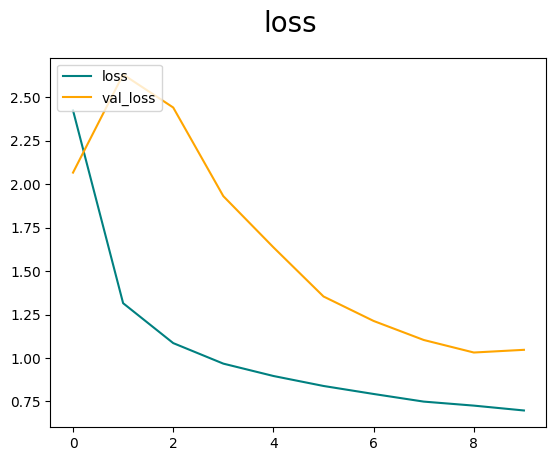

In [7]:
fig = plt.figure()
plt.plot(hist2.history['loss'],color='teal',label='loss')
plt.plot(hist2.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [16]:
from tensorflow.keras.models import load_model
import os

In [18]:
model.save(os.path.join('models','RWclassifierV1.keras'))

In [19]:
loaded_model = load_model(os.path.join('models','RWclassifierV1.keras'))

In [20]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 2423500 (9.24 MB)
Trainable params: 238938

In [2]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    '/Users/kevinsam/Desktop/Unif/Master/ThesisWheelchair/DATA/RoadSaW/RoadSaW-075_s/test',
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

NameError: name 'ImageDataGenerator' is not defined

In [1]:
test_data

NameError: name 'test_data' is not defined

In [13]:
from tensorflow.keras.metrics import Precision,Recall,Accuracy



for batch in test_data:
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

print(f"Precision {pre.result().numpy()} , Recall {re.result().numpy()} , Accuracy {acc.result().numpy()}")


1/1 [==============================] - 0s 218ms/step


KeyboardInterrupt: 